# Numerical Methods

# Lecture 1: Interpolation and curve fitting

## Learning objectives:


* Learn about standard methods to approximate discrete data points.


* Understand the differences between interpolation and curve-fitting (e.g. of noisy data).


* Implement methods to compute simple polynomial interpolation in 1D.


* Practice our Python coding.

In [29]:
# some imports we will make at the start of every notebook
# later notebooks may add to this with specific SciPy modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Introduction

## Interpolation vs curve-fitting

Consider a discrete set of data points 

$$ (x_i, y_i),\;\;\;\;\;\; i=0,\ldots,N,$$

and suppose that we wish to approximate this data in some sense. 

The data may be known to be exact (e.g. we may wish to approximate a complex function, which we can evaluate exactly, by a simpler expression say), or it may have acknowledged errors from measurement/observational techniques, with known or unknown [error bars](https://en.wikipedia.org/wiki/Error_bar).

### Interpolation

[*Interpolation*](https://en.wikipedia.org/wiki/Interpolation) generally assumes that these data points are *exact* (e.g. no measurement errors) and at *distinct* $x$ locations, i.e. there is no ambiguity in a mapping from $x$ to $y$ (which there would be if we had multiple $y$ values for the same $x$; we will see this scenario in the case of curve-fitting covered below). 

[Note that sometimes we may have control over the $x$ locations, but sometimes we won't - we'll just be given arbitrary data - we'll cover both cases below].

The process of interpolation then seeks to fit a function (or curve), 

$$ y = f(x), $$ 

to this data which *exactly passes through the $N+1$ discrete points*, 

i.e. given the data our job in interpolation is to find a suitable function $f$.


We can then use this function to find (or estimate) $y$ values at $x$ locations other than those provided by the data. 

When these new $x$ locations are within the range of known data points (i.e. for $x\in[\min\{x_i\},\max\{x_i\}]$) this process is called *interpolation*. 

In the case where we seek new $y$ values at $x$ locations that are outside the data range this is called [*extrapolation*](https://en.wikipedia.org/wiki/Extrapolation) (which we will return to towards the end of this lecture). We will only touch on this briefly, but the take-home message is: be extremely cautious when extrapolating and ideally don't do it!!

The requirement for distinct $x$ locations means that we have a constraint on the $x_i$'s which can be written as

$$x_0 < x_1 < \ldots < x_N,$$ 

(i.e. we will assume our data points have been sorted based on their $x$ values),

and for $f$ to be an [*interpolant*](http://mathworld.wolfram.com/Interpolant.html) we require that 

$$y_i = f(x_i),\;\;\;\;\;\; \forall i, \;\;\;\;\;\text{[$\forall \equiv$ "for all"]}$$

i.e. the curve mapped out by $\;y=f(x)\;$ for all $x$ values passes through ALL our $(x_i,y_i)$ data points exactly.

In this case the function $f$ is known as the *interpolating function*, or simply the *interpolant*.



In [28]:
trial = "hello"
print(f"To be {trial} or not to be?")

To be hello or not to be?


### Curve-fitting

Alternatively, when we have data with noise (potential errors), or multiple different measurement values ($y$) at a given $x$, then we may not want to, or simply cannot fit a function/curve that goes through all points exactly, and rather have to perform [**curve-fitting**](https://en.wikipedia.org/wiki/Curve_fitting) - finding a function that approximates the data in some sense but does not necessarily go through all the points. 

In this case we ***no longer*** have the requirement that 

$$x_0 < x_1 < \ldots < x_N,$$ 

and can consider the data simply as a *cloud of points*. 

This is the most typical case for real world data which contains variability and noise, and could additionally give rise to multiple different measurements (i.e. $y$ values) at the same $x$ location.

If we were to construct a single straight line:

$$y = m x+c, \;\;\;\;\; \text{where we have only two free parameters:} \;\;\; \text{the gradient} \;\;\;\; m 
\;\;\;\;\text{and the intercept} \;\;\;\; c$$ 

that, for example, minimised the sum of the squares of the differences to the data, this would be what is known as a [*least squares approximation*](https://en.wikipedia.org/wiki/Least_squares) to the data using a linear function.  We will return to this in a section on curve-fitting below.

With real data this fitting of data to a function often has the effect of *smoothing* complex or noisy data.



Note that curve fitting is related to the topic of [*regression analysis*](https://en.wikipedia.org/wiki/Regression_analysis). Fitting a polynomial to data in a least squares sense is an example of what can be termed *polynomial regression*; the example immediately above is therefore an example of *linear* regression (as our interpolant is linear in the parameters $m$ and $c$).  Note that some people will use the terms interpolation, curve-fitting and regression in inter-changeable ways - be careful over using the correct terminology.


### Choice of interpolating function

We have a lot of choice for how we construct the interpolating or curve-fitting function.

Considerations for how to do this include the required/desired smoothness of the resulting function (i.e. how many smooth, well-defined derivatives it has - cf. the piecewise polynomial case or a heaviside function say), replicating known positivity/boundedness or periodicity, the cost of evaluating it, etc.

Some choices include: polynomials, piecewise polynomials, trigonometric series (sums of sines and cosines leading to an approximation similar to [*Fourier series*](https://en.wikipedia.org/wiki/Fourier_series)).

### Some arbitrary test data

Let's first invent a small set of arbitrary data which we shall seek to interpolate throughout this lecture using different methods, and define a function that will save us from typing the same plotting commands multiple times.

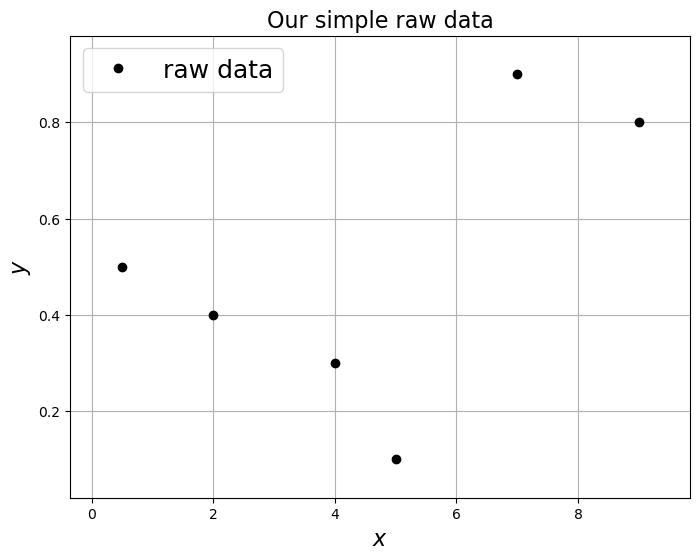

In [34]:
# Invent some raw data - we will use the notation (xi,yi) for the
# given data, where xi and yi are of length N+1 (N=len(xi)-1)
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# We will want to overlay a plot of the raw data a few times below so 
# let's do this via a function that we can call repeatedly
# [Note that I've been a bit lazy in later lectures and really should
# do this sort of thing more often to make code easier to read - apologies]
def plot_raw_data(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)


# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

# For clarity we are going to add a small margin to all the plots.
ax1.margins(0.1)

# plot the raw data
plot_raw_data(xi, yi, ax1)

# add a figure title
ax1.set_title('Our simple raw data', fontsize=16)

# Add a legend
ax1.legend(loc='upper left', fontsize=18);
# loc='best' means we let matplotlib decide the best place for the
# legend to go.  For other options see 
#  https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

To make this somewhat challenging note that there is quite a jump in the data either side of the location $x=6$.

### Simple interpolation example

One of the simplest examples of interpolation is to simply fit a straight line between every two successive data points.

This is termed *piecewise-linear* interpolation, and the resulting function is called a piecewise-linear interpolant.

This is an example of the more general piecewise-polynomial interpolation where a collection of polynomials are joined together, either continuously or discontinuously (i.e. with jumps between each polynomial section).

Note that the default approach to plotting effectively performs piecewise-linear interpolation as we shall now see.

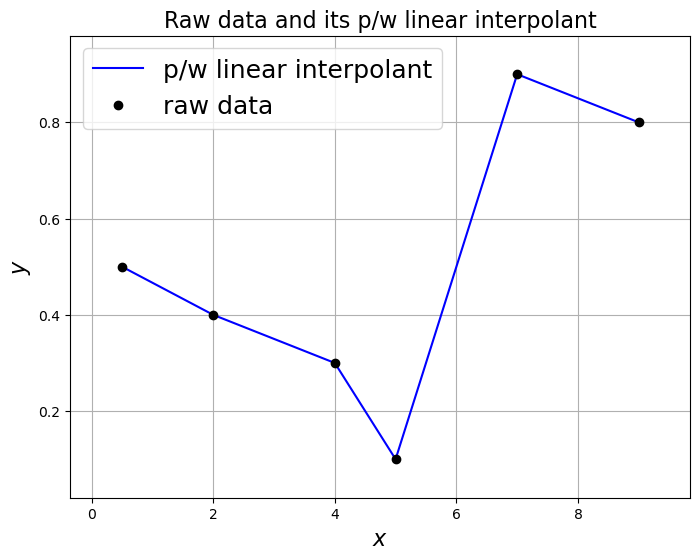

In [36]:
# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Plot a piecewise-linear approximation.
# We get this simply by connecting the points with straight lines
# and this is the default behaviour of the plotting routine so simply
# involves a call to 'plot' with our data.
ax1.plot(xi, yi, 'b', label='p/w linear interpolant')

# Overlay raw data
plot_raw_data(xi, yi, ax1)

# Add a legend
ax1.legend(loc='best', fontsize=18)

# add a figure title
ax1.set_title('Raw data and its p/w linear interpolant', fontsize=16);

### Simple curve-fitting example

While we could just use the default plotting method to demonstrate linear interpolation, to demonstrate linear curve-fitting we need to do a bit more work.

The example below demonstrates how we can use `numpy.polyfit` to do this for us - take a look at the docs here <https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html>.

``` Python
numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
```
>   Least squares polynomial fit.

>   Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). Returns a vector of coefficients p    that minimises the squared error.

So it returns the coefficients of the polynomial fit to the data (ordered from the highest power of $x$ to the smallest). We can then use `numpy.poly1d` to turn this into a function we can easily evaluate, as seen in the next example.

If we were doing this evaluation ourselves we would need to read the docs carefully to see that the first entry of the returned coefficient is the multiplier of the highest power of $x$ - i.e. in the linear case the gradient, with the second number being the intercept. Printing the coefficients out below we see this to be correct.

poly_coeffs:  [0.0508044  0.26714649]


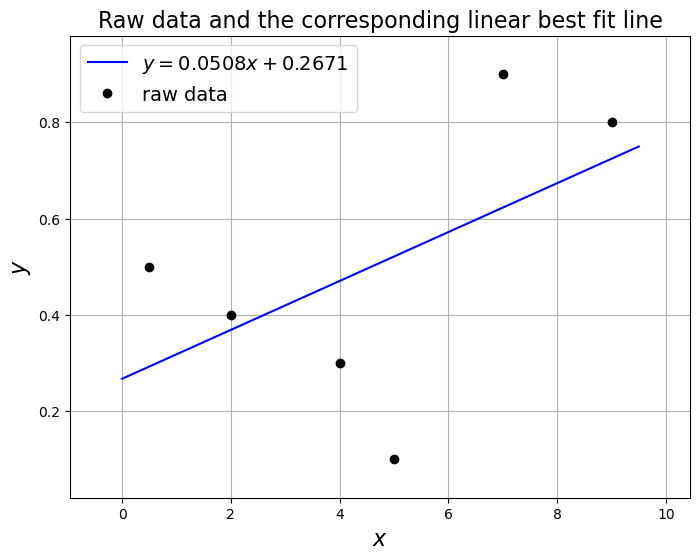

In [58]:
# Fit a polynomial of degree 1, i.e. a straight line, to our (xi, yi) data from above
# we'll explain what's going on here later in this lecture
degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
print('poly_coeffs: ',poly_coeffs)

# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Plot the linear fit - define 100 evenly spaced points (x) covering our
# x extent and plot our linear polynomial evaluated at these points (p1(x))
# of course 100 is overkill for this linear example
x = np.linspace(0., 9.5, 100)
# NB. the 'linspace' function from numpy returns evenly spaced numbers 
# over a specified interval. It takes three arguments; the first two 
# are the bounds on the range of values, and the third is the total 
# number of values we want.
# See the docs (i.e. np.linspace?) for additional options arguments

ax1.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))

# Overlay raw data
plot_raw_data(xi, yi, ax1)

# Add a legend
ax1.legend(loc='best', fontsize=14)

# add a figure title
ax1.set_title('Raw data and the corresponding linear best fit line', fontsize=16);

# Polynomial interpolation

## Introduction

1. Suppose we are given a set of $N+1$ data points $(x_i, y_i)$ (with distinct $x_i$'s). 


2. Now suppose we construct a polynomial of degree $N$:

$$ P_N(x) := a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \ldots + a_N x^N, $$

where $a_0, \, a_1, \, \ldots, \, a_N$ are the coefficients of our polynomial. 


- Note that I am going to order the coefficients so the first $a_0$ corresponds to the constant term, the second corresponds to the linear (in $x$) term and so on up - so the opposite convention to `numpy.polyfit`.
    
    
- Note that there are $N+1$ of these coefficients available to us with a degree $N$ polynomial. This number of free parameters ($N+1$) agreeing exactly with the number of data points ($N+1$) is important as it's exactly the right number to allow us to determine the coefficients uniquely - essentially when we substitute in our data we can write this information as a linear matrix system we can invert (as its square system) for the coefficients.


- We recognise this $\;P_N\;$ as the simple expression for a *polynomial* we have probably been introduced to before. 

## Aside: how this problem leads to a square matrix system

Assume we have two pieces of information and want to fit a linear line - let's write these out:

\begin{align*}
(1) & \;\;\;\; y_0 = a_0 + a_1\,x_0, \\[5pt]
(2) & \;\;\;\; y_1 = a_0 + a_1\,x_1. 
\end{align*}

We are assuming we know the $x$'s and the $y$'s, and we want to find the $a$'s.

There are multiple ways we could solve this, one way is to think about how you solve simultaneous equations - e.g. rearrange the second equation to give an expression for $a_1$ in terms of $a_0$, and so on, .... [we'll return to these ideas in a later lecture].

However this isn't easy to do with large amounts of data.

Instead we can note that this is equivalent to forming and solving the linear system

$$
\begin{pmatrix}
1 & x_0  \\
1 & x_1 
\end{pmatrix}
\begin{pmatrix}
a_0\\
a_1
\end{pmatrix}
=
\begin{pmatrix}
y_0\\
y_1
\end{pmatrix}.
$$

Note that we can also interpret this as a *linear combination* of a <a href="https://en.wikipedia.org/wiki/Basis_(linear_algebra)">*basis*</a> made up of single-term polynomials: 

$$1, \; x, \; x^2, \; \ldots, \; x^N.$$ 

These single term polynomials are also referred to as [*monomials*](https://en.wikipedia.org/wiki/Monomial). 

Our linear example from earlier is an example of this with two free parameters.

We will come back to monomials, as well as other (NB. a basis is not unique) potential functions/polynomials to use as basis functions later -  we will see below that other basis options can be significantly more convenient when actually implementing interpolation.


#### Can we do better than using monomials?

While this is perhaps the simplest (it's consistent with the simplest definition of a polynomial we are used to seeing) and the most obvious way to proceed, we should ask ourselves can we do better? 

i.e. can we try to use a different (less obvious) basis that might mean we don't have a (potentially large, and difficult) matrix system to solve for the coefficients?

# Lagrange polynomial

The answer is yes, and [Lagrange polynomials](http://mathworld.wolfram.com/LagrangeInterpolatingPolynomial.html) are a particularly popular choice for constructing an interpolant for a given data set. 

Given a set of $(N+1)$ points as above, the Lagrange polynomial is defined as the linear combination

$$L(x) := \sum_{i=0}^{N} y_i \ell_i(x),$$

where the $\ell_i(x)$ are a new choice for our basis functions (different to the monomials, but the same idea in that they form a <a href="https://en.wikipedia.org/wiki/Basis_(linear_algebra)">*basis*</a> for the space of polynomials), and the $y_i$ are the $N+1$ weights/coefficients corresponding to this basis.

<br>

Note that this is not a typo and we are not re-using notation here - we will see that by construction **the weights in this approach actually ARE the same as the $y_i$'s making up the data we are interpolating!**

<br>

This is the whole point of this approach - we no longer have to compute the weights by inverting a matrix system as we had to above with monomials. 

Now, by construction of this approach, we know the weights directly from the given data.

The functions $\ell_i(x)$ are known as the *Lagrange basis polynomials* and are defined by the product


\begin{align}
\ell_i(x) &:= \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}} \frac{x-x_m}{x_i-x_m} \\[10pt]
& \, \equiv \frac{(x-x_0)}{(x_i-x_0)} \cdots \frac{(x-x_{i-1})}{(x_i-x_{i-1})} \frac{(x-x_{i+1})}{(x_i-x_{i+1})} \cdots \frac{(x-x_N)}{(x_i-x_N)},
\end{align}

where $0\le i\le N$.

If $N=0$ (*i.e.* if there is only one point in the data set), there is only one Lagrange basis polynomial defined by convention as $\ell_0=1$.

Notice from the definition of these basis functions the clear requirement that no two $x_i$ are the same, $x_i - x_m \neq 0$, so this expression is always well-defined (i.e. we never get a divide by zero!). 

The reason pairs $x_i = x_j$ with $y_i\neq y_j$ are not allowed is that no interpolation function $L$ such that $y_i = L(x_i)$ would exist; a **function** can only return a single unique value for each argument $x_i$ (this uniqueness is part of the definition of a <a href="https://en.wikipedia.org/wiki/Function_(mathematics)">*function*</a>).

On the other hand, if also $y_i = y_j$, then those two points would actually be one single point - we would thus have redundant data and really we could throw one away and would be looking for a degree $N-1$ degree to interpolate $N$ **distinct** data points.

For all $j\neq i$, $\ell_j(x)$ includes the term $(x-x_i)$ in the numerator (the thing on the top), so the whole product will be zero when evaluated at $x=x_i$:

$$\ell_{j\ne i}(x_i) =
\prod_{\begin{smallmatrix}0\le m\le N\\ m\neq j\end{smallmatrix}}
 \frac{x_i-x_m}{x_j-x_m} = \frac{(x_i-x_0)}{(x_j-x_0)} \cdots \frac{(x_i-x_i)}{(x_j-x_i)} \cdots \frac{(x_i-x_N)}{(x_j-x_N)} = 0.$$

On the other hand a basis function $i$ evaluated at location $x_i$ returns 1:

$$\ell_i(x_i) = 
\prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}}
\frac{x_i-x_m}{x_i-x_m} = 1.$$

In other words, all of the basis functions/polynomials are zero at the exact locations of the data ($x=x_i$), except for $\ell_i(x)$, for which it holds that $\ell_i(x_i)=1$, because it lacks the $(x-x_i)$ term in the product.

It follows that 

$$y_i \ell_i(x_i)=y_i,$$ 

and therefore at each point $x_i$

$$L(x_i)=\sum_{j=0}^{N} y_j \ell_j(x_i)=0+0+\dots + y_i + 0 +\ldots +0=y_i,$$ 

showing that $L$ does indeed interpolate (i.e. pass through) the data points exactly.

To help illustrate our discussion lets go back to our simple example from earlier.

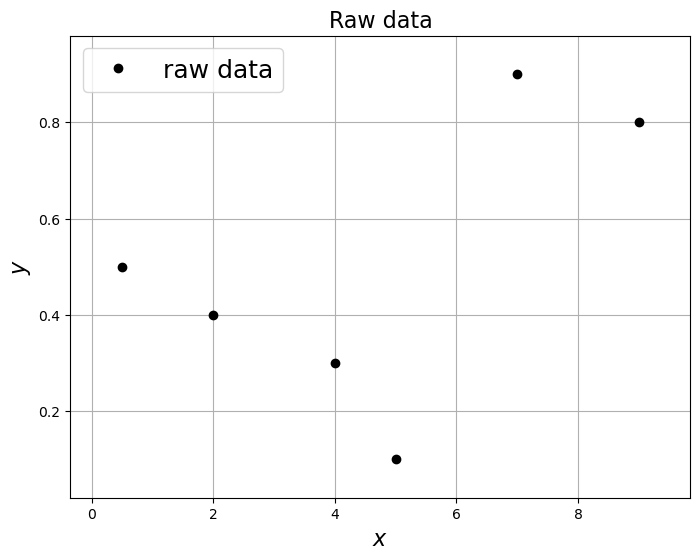

In [5]:
# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Overlay raw data
plot_raw_data(xi, yi, ax1)

# Add a legend
ax1.legend(loc='best', fontsize=18)

# add a figure title
ax1.set_title('Raw data', fontsize=16);

## Using scipy.interpolate

Note that we can use SciPy to evaluate the individual Lagrange basis function and polynomial.

[If you're feeling brave and finding the other exercises straightforward feel free to attempt this yourself and check you can recreate the plot we generate below using SciPy. Instead we will introduce a slightly easier approach below and implement that ourselves.]

For example, we can use [scipy.interpolate.lagrange](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html)
from Python's [SciPy](http://www.scipy.org) library to generate the Lagrange polynomial for a dataset as shown in the next cell.

Note: SciPy provides a [wide range of interpolators](http://docs.scipy.org/doc/scipy/reference/interpolate.html) with many different properties which we do not have time to go into in this course. 

When you need to interpolate data for your specific application then you should look at the literature (or indeed the remainder of this lecture) to ensure that you are using an appropriate one.

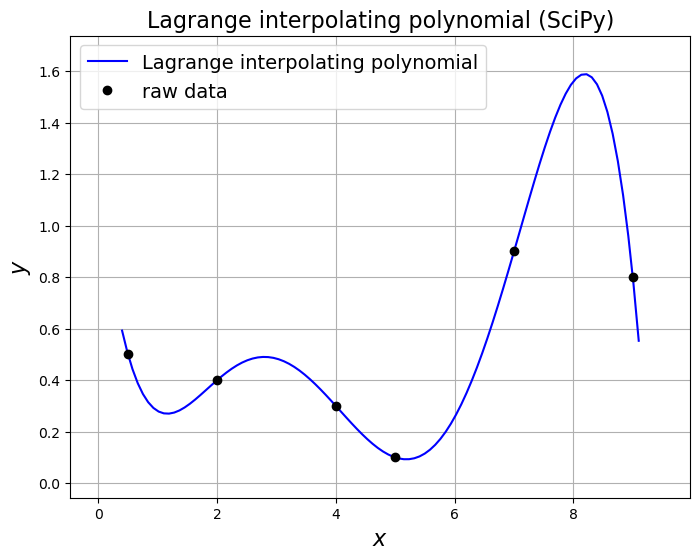

In [6]:
# as we're using a new package make sure we import the relevant part first
import scipy.interpolate as si

### Our raw data from earlier - you can also test on our three data point example
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Create the Lagrange polynomial for the given points.
lp = si.lagrange(xi, yi)
# above we executed 'import scipy.interpolate as si'
# and so this line is calling the 'lagrange' function from the 
# 'interpolate' sub-package within scipy.

# Evaluate this function at a high resolution (100 points here) so that 
# we get a smooth well-resolved line when we plot our polynomial
x = np.linspace(0.4, 9.1, 100)

# set up the figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# actually plot (x,y)=(x,lp(x)) on the axes with the label ax1
ax1.plot(x, lp(x), 'b', label='Lagrange interpolating polynomial')

# Overlay raw data on the same axes
plot_raw_data(xi, yi, ax1)
ax1.set_title('Lagrange interpolating polynomial (SciPy)', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);

<font color="yellow"><b>Only for pen and paper version. There is a .lagrange function for this</b></font>

<font color="yellow"><b>y = (x-x1)/(x0-x1) * y0 + (x-x0)/(x1-x0) * y1</b></font>

<font color="yellow"><b>This formula creates a linear interpolant for the two points. If you want to add a third point and create a quadratic interpolant, you would need to add another term to the formula. For example, if you have a third point (x2, y2), the formula would become:</b></font>

<font color="yellow"><b>y = ((x-x1)*(x-x2))/((x0-x1)*(x0-x2)) * y0 + ((x-x0)*(x-x2))/((x1-x0)*(x1-x2)) * y1 + ((x-x0)*(x-x1))/((x2-x0)*(x2-x1)) * y2</b></font>


### <span style="color:blue">Exercise 1.1: Picewise-linear Lagrange interpolant </span>

What are the Lagrange basis polynomials when $N=1$?

Evaluate by *pen and paper* the linear approximation $L_1(x)$ (i.e. the Lagrange polynomial of degree 1) which passes through the two points $(0.0,0.1),(1.0,0.9)$.

Notice that this method is just a glorified approach to obtain the equation of a line you are familar with: $y=mx+c$.

# Error in Lagrange interpolation

Note that it can be proved that in the case where we are interpolating a known function (e.g. a complicated non-polynomial function such as $\exp$ or $\sin$) by a simpler polynomial, the error at any point we evaluate the interpolant at is proportional to:


- (1) the distance of that point from any of the data points (which makes sense as the error is obviously zero at the data points),


- (2) and to the $(N+1)$-th derivative of that function evaluated at *some* location within the bounds of the data.  


i.e. the more complicated (sharply varying) the function is, and the further we move from a data location, the higher the error *could* be.

This result is sometimes called the [*Lagrange remainder theorem*](https://en.wikipedia.org/wiki/Polynomial_interpolation#Interpolation_error) - only click on this if you're feeling brave!

### <span style="color:blue">Exercise 1.2: Approximating a function </span>

Sample the function $y(x)=x^3$ at the points $x=(1,2,3)$.  

Write some code to construct the Lagrange polynomials $L_0$ (the constant interpolant going through the $x=2$ data point only), $L_1$ (the linear interpolant going through the $x=1$ and $x=3$ points) and $L_2$ (the quadratic interpolant going through all three points). Plot the resulting polynomials along with the error compared to the original exact function.

**Tip**: Using the function [fill_between](http://matplotlib.org/examples/pylab_examples/fill_between_demo.html) provides a nice way of illustrating the difference between graphs.

## Newton polynomial

Calculating the Newton polynomial (also called [Newton's divided difference interpolation polynomial](http://mathworld.wolfram.com/NewtonsDividedDifferenceInterpolationFormula.html)) yields the same polynomial as the Lagrange polynomial method (remember that the polynomial of minimum degree to pass through each data point is unique), but is arguably easier to implement.

To derive this approach we write our degree $N$ polynomial in the following form


$$ P_N(x) = a_0 +(x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + \cdots + (x-x_0)(x-x_1)\ldots(x-x_N)a_N,$$


where $a_0, a_1, \ldots, a_N$ are our $N+1$ free parameters we need to find using the $N+1$ pieces of information we have in the given data.

Efficient derivation of an algorithm to compute the Newton polynomial follows from noticing that we can write this polynomial in a <a href="https://en.wikipedia.org/wiki/Recursion_(computer_science)">*recursive form*</a>.  

Consider for example a case with $N=3$:


\begin{align}
P_3(x) = a_0 +(x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + (x-x_0)(x-x_1)(x-x_2)a_3.
\end{align}

Notice first that this can be written as

\begin{align}
P_3(x) = a_0 +(x-x_0)[a_1 + (x-x_1)[a_2 + (x-x_2)a_3]],
\end{align}

and that substituting in the $x_i$ values leads to a set of simultaneous equations where we can easily evaluate the unknowns $a_0, a_1, \ldots$ using 'back (or forward) substitution' (we'll see what this means in the example that follows, and we will also return to this idea in Lecture 5/6).  

Let's go through an example to see how this works ...

1. Substitute $x=x_0$: We have $P_3(x_0)=a_0$, and we know that our interpolant $P_3(x)$ evaluated at $x_0$ must return $y_0$. Hence we must conclude that 

$$a_0 = y_0.$$


2. Now substitute $x=x_1$: We have $P_3(x_1) = a_0 +(x_1-x_0)a_1 = y_0 +(x_1-x_0)a_1 $, the LHS of this must to  $y_1$, and we know everything on the RHS as we have already calculated that $a_0 = y_0$. We can thus trivially rearrange to yield

$$ a_1 = \frac{(y_1 - y_0)}{(x_1-x_0)}.$$


3. Substituting $x=x_2$ yields 

\begin{align*}
& y_2 = P_3(x_2) = a_0 +(x_2-x_0)[a_1 + (x_2-x_1)a_2] = y_0 + (x_2-x_0)\left[ \frac{(y_1 - y_0)}{(x_1-x_0)} + (x_2-x_1)a_2\right]\\[5pt]
&\implies a_2 = \frac{ \frac{(y_2 - y_0)}{(x_2-x_0)} - \frac{(y_1 - y_0)}{(x_1-x_0)}}{x_2-x_1}.
\end{align*}


4. And so on ...

To define an algorithm for this method in general let's first introducing the following [*divided difference*](https://en.wikipedia.org/wiki/Divided_differences) notation

\begin{alignat*}{2}
\Delta y_i &= \frac{y_i-y_0}{x_i-x_0},\;\;    && i=1,2,\ldots, N,\\[10pt]
\Delta^2 y_i &= \frac{\Delta y_i-\Delta y_1}{x_i-x_1},\;\;    && i=2, 3,\ldots, N,\\[10pt]
&\vdots\\[5pt]
\Delta^N y_N &= \frac{\Delta^{N-1} y_N-\Delta^{N-1} y_{N-1}}{x_N-x_{N-1}}.
\end{alignat*}


With a bit of thought we can hopefully see from the above example that the coefficients of the interpolating polynomial in the general case are given by


$$a_0=y_0,\;\;\;\;\; a_1 = \Delta y_1, \;\;\;\;\; a_2 = \Delta^2 y_2, \;\;\;\;\; \ldots \;\;\;\;\; a_N = \Delta^N y_N.$$

So an algorithm to evaluate the Newton Polynomial could follow this process:

<br>

1. Initialise the unknown array $a$ with the data $y$, so that

$$ a_0 = y_0, \quad a_1 = y_1, \quad a_2 = y_2, ...$$

Based on our derivation above we know that the first of these is correct, i.e. we want to preserve this value for $a_0$ as we move forward.

<br>

2. So in this step we don't want to touch $a_0$, but the other $a$ values can be updated. Let's set

$$ a_1 = \frac{(a_1 - a_0)}{(x_1-x_0)}, \quad a_2 = \frac{(a_2 - a_0)}{(x_2-x_0)}, ... $$

but note that due to the values that $a_0$ and $a_1$ take (before $a_1$) is over-written) this has the result of setting

$$ a_1 = \frac{(y_1 - y_0)}{(x_1-x_0)} $$ 

which is what we want, so in the next step we don't want to touch $a_1$ (in addition to not touching $a_0$).

<br>

3. So now we set

$$ \quad a_2 = \frac{(a_2 - a_1)}{(x_2-x_1)} $$

but based on the expressions currently stored in $a_1$ and $a_2$ this is equal to

$$ a_2 = \frac{ \frac{(y_2 - y_0)}{(x_2-x_0)} - \frac{(y_1 - y_0)}{(x_1-x_0)}}{x_2-x_1} $$

and so on.

<br>

So as we progress we are constantly over-writing the $a$ array, but each iteration leaves an additional one at the start untouched, and the value that remains there is exactly what we need for our final result. So once we have completed the iteration, and updated all $a$ values, we will have exactly the coefficients we need in the $a$ array.

If we stay calm and write out the maths of the algorithm like this, it make it much easier to implement in code:

In [7]:
# consider the above example data again
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])


def calculate_newton_poly_coeffs(xi, yi):
    """ Evaluate the coefficients a_i recursively using Newton's method
    """
    # initialise the array 'a' with yi, but take a copy to ensure we don't
    # overwrite our yi data!
    a = yi.copy()

    # we have N+1 data points, and so
    N = len(a) - 1

    # For each k, we compute Δ^k y_i from the a_i = Δ^(k-1) y_i 
    # of the previous iteration
    # We start our loop witk k=1 since we initially don't want to 
    # touch a_0 which is already equal to y_0
    for k in range(1, N+1):
        # but only for i>=k
        for i in range(k, N+1):
            a[i] = (a[i] - a[k-1])/(xi[i]-xi[k-1])
    return a


# Given the coefficients a, and the data locations xi,
# define a function to evaluate the Newton polynomial
# at locations given in the array x.
# NB. this is just an evaluation of the P_n(x) = ... formula
# given at the start of this section.

def eval_newton_poly(a, xi, x):
    """ Function to evaluate the Newton polynomial
    at x, given the data point xi and the polynomial coeffs a
    """
    N = len(xi) - 1  # polynomial degree
    # recursively build up polynomial evaluated at x
    P = a[N]
    for k in range(1, N+1):
        P = a[N-k] + (x - xi[N-k])*P
    return P

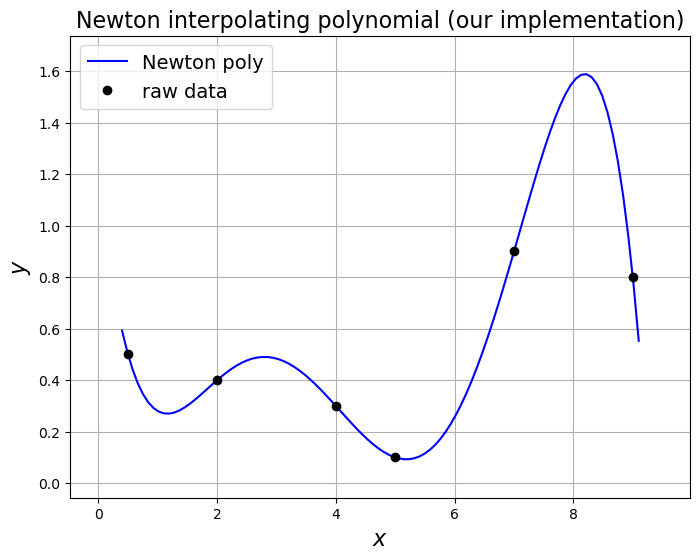

In [8]:
# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

# add a small margin 
ax1.margins(0.1)

# Evaluate the coefficients of the Newton polynomial
a = calculate_newton_poly_coeffs(xi, yi)
# Evaluate the polynomial at high resolution and plot
x = np.linspace(0.4, 9.1, 100)
ax1.plot(x, eval_newton_poly(a, xi, x), 'b', label='Newton poly')

# Overlay raw data
plot_raw_data(xi, yi, ax1)
ax1.set_title('Newton interpolating polynomial (our implementation)', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);

# Curve fitting
Curve-fitting in the [least squares](http://mathworld.wolfram.com/LeastSquaresFitting.html) sense is popular when the dataset contains noise (nearly always the case when dealing with real world data). 

This is straightforward to do for polynomials of different polynomial degree using [numpy.polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html), as we shall now see.

In [61]:
# consider the above example data again
xi=np.array([0.5,2.0,4.0,5.0,7.0,9.0])
yi=np.array([0.5,0.4,0.3,0.1,0.9,0.8])

# Calculate coefficients of polynomial degree 0 - ie a constant value.
poly_coeffs=np.polyfit(xi, yi, 0)

# Construct a polynomial function which we can use to evaluate for arbitrary x values.
p0 = np.poly1d(poly_coeffs)

# Fit a polynomial degree 1 - ie a straight line.
poly_coeffs=np.polyfit(xi, yi, 1)
p1 = np.poly1d(poly_coeffs)

# Quadratic
poly_coeffs=np.polyfit(xi, yi, 2)
p2 = np.poly1d(poly_coeffs)

# Cubic
poly_coeffs=np.polyfit(xi, yi, 3)
p3 = np.poly1d(poly_coeffs)

################ my own work
poly_coeffs=np.polyfit(xi, yi, 5)
p5 = np.poly1d(poly_coeffs)

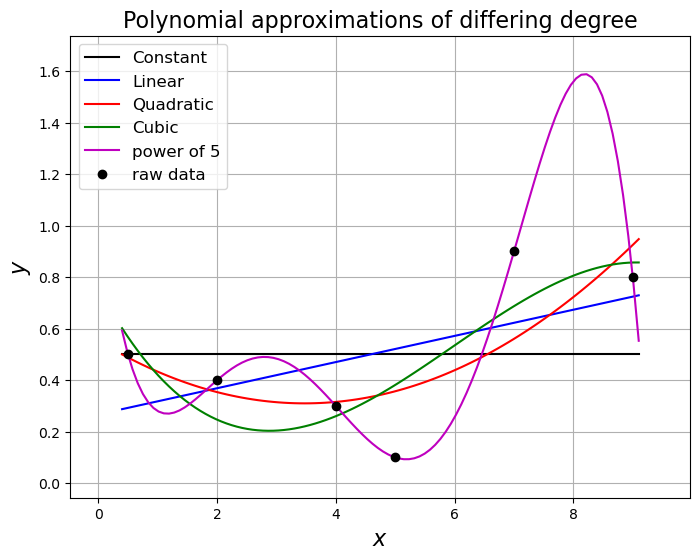

In [68]:
# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x = np.linspace(0.4, 9.1, 100)

ax1.plot(x, p0(x), 'k', label='Constant')
ax1.plot(x, p1(x), 'b', label='Linear')
ax1.plot(x, p2(x), 'r', label='Quadratic')
ax1.plot(x, p3(x), 'g', label='Cubic')
ax1.plot(x, p5(x), 'm', label='power of 5')

# Overlay raw data
plot_raw_data(xi, yi, ax1)

ax1.legend(loc='best', fontsize = 12)
ax1.set_title('Polynomial approximations of differing degree', fontsize=16);

### <span style="color:blue">Exercise 1.3: Squared error calculation</span>

As described in the docs ([numpy.polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)), least squares fitting minimises the sum of the squares of the differences between the data provided and the polynomial approximation, i.e. it minimises the expression

$$E = \sum_{i=0}^{N} (P(x_i) - y_i)^2,$$

where $P(x_i)$ is the value of the polynomial function that has been fit to the data evaluated at point $x_i$, and $y_i$ is the $i^{th}$ data value.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Linear_least_squares_example2.svg" style="width: 300px">

*(Wikipedia: https://en.wikipedia.org/wiki/Linear_least_squares) We're computing the sum of the squares of the distances indicated in green.*



Write a Python function that evaluates the squared error, $E$, and use this function to evaluate the error for each of the polynomials calculated above.

**Tip**: Try to pass the function *p* in as an argument to your error calculation function. One of the great features of Python is that it is easy to pass in functions as arguments.

Why is the square of the difference used? 

### <span style="color:blue">Exercise 1.4: Degree of approximation </span>

Extend the example above by fitting and plotting polynomials of increasing degree past cubic. At what *degree* does the resulting polynomial approximation equate to the Lagrange interpolant?

Why does this make sense? 

**Hint**: think about the number of free parameters in a polynomial, and the amount of data you have.

# Extrapolation

*Interpolation* by definition is used to estimate $y$ for values of $x$ within the bounds of the available data (here $[0.5,9]$) with some confidence. *Extrapolation* on the other hand is the process of estimating (e.g. using the interpolating function) $y$ *outside* the bounds of the available data. However, extrapolation requires a great deal of care as it will become increasingly inaccurate as you go further out of bounds.

### <span style="color:blue">Exercise 1.5: Extrapolation </span>

Recreate the plots in the example above for different degrees of polynomial, setting the x-range from -2.0 to 11.0. What do you notice about extrapolation when you use higher degree polynomials.

### <span style="color:blue">Exercise 1.6: Submarine landslide size in the North Atlantic </span>

Open the data file [Length-Width.dat](data/Length-Width.dat) (located in the data directory) giving the lengths and widths of submarine landslides in the North Atlantic basin [from [Huhnerbach & Masson, 2004](http://www.sciencedirect.com/science/article/pii/S0025322704002774), Fig. 7].  Fit a linear best fit line using polyfit and try to recreate the image below.

**Hint**: You will need to take the log of the data before fitting a line to it. </span>

!["Cloud of point data for submarine landslide widths and depths in the North Atlantic, and a correspondong best (linear) curve fit."](images/Width-Length.png)


Reference: [V. Huhnerbach, D.G. Masson, Landslides in the North Atlantic and its adjacent seas:
an analysis of their morphology, setting and behaviour, Marine Geology 213 (2004) 343 – 362.](http://www.sciencedirect.com/science/article/pii/S0025322704002774)